# <div align="center"><ins>Project on Predictive Data Modeling with Portugal 2019 Election Data</ins></div>

<div align="center"><img src="election-img.jpg" width = 100%/></div>

***
**NORKA B5, Group 3**<br>
**Team Members:** *Sruthy Surendran, Heleena Joy, Jebitta Joseph, Gopikrishna Shyam Kumar, Sreehari P S*
***

### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a combination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.<br><br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*<br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**

|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes (NOTA)|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes (Incorrect Info)|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Number of votes cast|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|Number of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Number of votes cast (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
>1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.
3. "Território Nacional" refers to portugal as a nation, not a serparate district as others. "Madeira and Açores" are Autonomous regions in Portugal

### Problem Statement
>To apply regression modelling to predict total number of MPs elected from a party under a given region.

***
### <div align="center"> Python Environment Setup </div>
***

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Basic Analysis </div>
***

In [2]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("Portugal_Election_Data.csv")

In [ ]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [ ]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


***
### <div align="center"> Data Preprocessing</div>
***

In [ ]:
colset1 = ['TimeElapsed','time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes'] # Sreehari P S
colset2 = ['numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage'] # Sruthy Surendran
colset3 = ['subscribedVoters','totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes','pre.nullVotesPercentage'] # Heleena Joy
colset4 = ['pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Percentage'] # Gopikrishna Shyam Kumar
colset5 = ['validVotesPercentage','Votes', 'Hondt', 'FinalMandates'] # Jebitta Joseph

<div class="alert alert-success"><b>1. Handling Null values</b></div>

In [ ]:
ucdata.isna().sum()

TimeElapsed                  0
time                         0
territoryName                0
totalMandates                0
availableMandates            0
numParishes                  0
numParishesApproved          0
blankVotes                   0
blankVotesPercentage        14
nullVotes                    0
nullVotesPercentage          0
votersPercentage             0
subscribedVoters             0
totalVoters                  7
pre.blankVotes               0
pre.blankVotesPercentage     0
pre.nullVotes                0
pre.nullVotesPercentage     12
pre.votersPercentage         0
pre.subscribedVoters         0
pre.totalVoters              0
Party                        0
Mandates                     0
Percentage                   0
validVotesPercentage         0
Votes                        0
Hondt                        0
FinalMandates                0
dtype: int64

#### **Findings:** There are Null values present.
|Column Name|Number of Null Values|
|:-:|:-:|
|blankVotesPercentage|14|
|totalVoters|7|
|pre.nullVotesPercentage|12|

**Ways to fill null values:**
***
1. *Imputation*
>The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.
>* Mean, Median and Mode
>* Last Observation Carried Forward (LOCF)
>* Next Observation Carried Backward (NOCB)
>* Linear Interpolation
>* Seasonal Adjustment with Linear Interpolation
>* Multiple Imputation
>* K Nearest Neighbors
2. *Removing Data*
>When dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis. In some situations, observation of specific events or factors may be required.

For the Portuguese Election dataset **Imputation** is the right choice. From the dataset it is clear that these missing values are indeed related to other columns.<br>
Hence missing values can be imputed with values calculated from other columns.<br>The formula for caluculations are given below.

$$
totalVoters = \frac{votersPercentage*subscribedVoters}{100}
$$
<br>
$$
pre.nullVotesPercentage = \frac{pre.nullVotes}{pre.totalVoters}*100
$$
<br>
$$
blankVotesPercentage = \frac{blankVotes}{totalVoters}*100
$$

In [ ]:
cdata = ucdata

In [ ]:
# Handle "totalVoters"
cdata['totalVoters'] = ucdata['totalVoters'].fillna(round((ucdata['votersPercentage']*ucdata['subscribedVoters'])/100))

In [ ]:
# Handle "pre.nullVotesPercentage"
cdata['pre.nullVotesPercentage'] = ucdata['pre.nullVotesPercentage'].fillna(round(((ucdata['pre.nullVotes']/ucdata['pre.totalVoters'])*100),2))

In [ ]:
# Handle "blankVotesPercentage"
cdata['blankVotesPercentage'] = ucdata['blankVotesPercentage'].fillna(round(((ucdata['blankVotes']/ucdata['totalVoters'])*100),2))

In [ ]:
cdata.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

**All Missing values are handled**

<div class="alert alert-success"><b>2. Handle Outliers</b></div>

In [ ]:
# Columns set 1
print(colset1)

['TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes']


#### **Observation:**
>Both TimeElapsed and time are time-components for the dataset. They span 4hr 25mins. So no need to handle outliers for these fields

In [ ]:
def draw_boxes(columns, nrow, ncolumn, figuresize):
    fig, axes = plt.subplots(nrows = nrow, ncols = ncolumn, figsize = figuresize)
    for col, ax in zip(columns, axes.flat):
        sns.boxplot(x = col, data = cdata, ax=ax, color = 'r')
        ax.set_title('Box plot for ' + col)
    # disable leftover axes
    for ax in axes.flat[len(columns):]:
        ax.set_axis_off()
    plt.show()

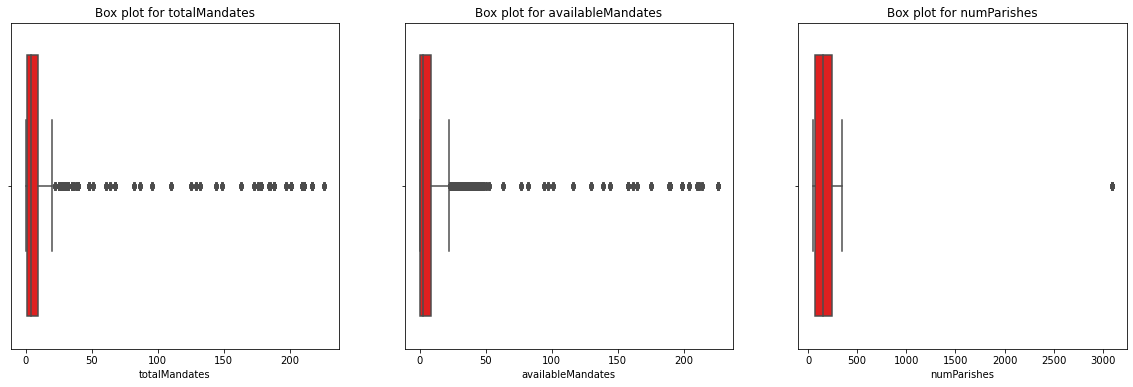

In [ ]:
# Column set 1
draw_boxes(colset1[3:6], 1, 3, (20, 6))

In [ ]:
cdata[colset1[3:6]].describe().T

,count,mean,std,min,25%,50%,75%,max
totalMandates,21643.0,11.544795,31.314567,0.0,1.0,4.0,9.0,226.0
availableMandates,21643.0,11.499284,31.738783,0.0,0.0,3.0,9.0,226.0
numParishes,21643.0,309.956013,659.055911,54.0,75.0,147.0,242.0,3092.0


#### **Conclusion:**
From the graph and quatiles it can be seen that there are outliers present in the dataset. **But**, if we observe the dataset closly interesting observations can be found.

* **totalMandates** represents 'MP's elected at the moment' and **availableMandates** represents 'MP's left to elect at the moment'. These 2 columns are inverse to each other i.e. as time passes *totalMandates* decreases and *availableMandates* increases by same amount.<br>
* From the distribution it is clear that for most time-period in dataset *totalMandates* and *availableMandates* equals "zero".<br> This is a valid case as we know in election, count of elected members only increase towards end of counting.

So from the context of this dataset we can conclude that the outliers that we see in plots of *totalMandates* and *availableMandates* can be ignored.

* For the column **numParishes**, there is only 1 outlier, i.e. 3092

This is also a valid outlier as we know that our dataset contains rows that represent Portugal as a whole. This particular row will contain the sum of all others.<br> So this outlier can also be ignored.<br>Another important thing to consider is, since the data for a specific region is collected for a time span of 265mins, for each Party, majority of Regions specific data tends to duplicate.

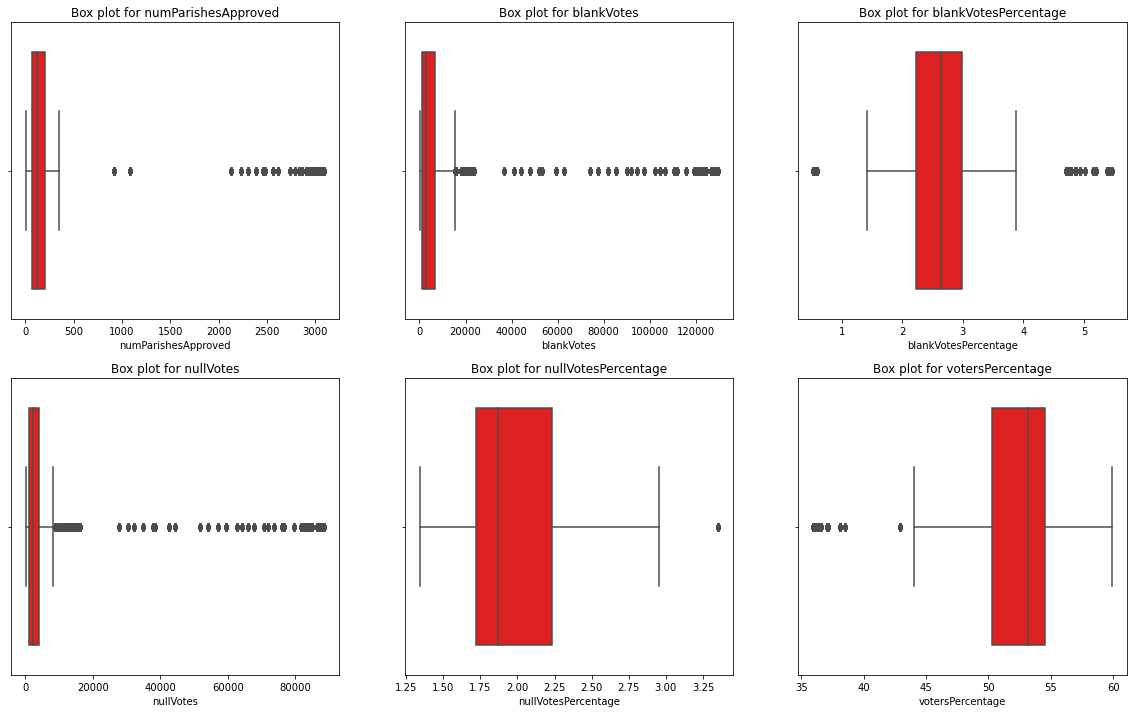

In [ ]:
# Column set 2
draw_boxes(colset2, 2, 3, (20, 12))

In [ ]:
cdata[colset2].describe().T

,count,mean,std,min,25%,50%,75%,max
numParishesApproved,21643.0,261.090237,583.377428,3.00,67.00,120.00,208.00,3092.00
blankVotes,21643.0,8875.066673,21484.874088,19.00,1188.00,2998.00,6889.00,129599.00
blankVotesPercentage,21643.0,2.621629,0.795289,0.53,2.23,2.64,2.98,5.46
nullVotes,21643.0,6148.068752,14735.469269,39.00,1094.00,2232.00,4121.00,88539.00
nullVotesPercentage,21643.0,1.961471,0.375250,1.34,1.72,1.87,2.23,3.35
votersPercentage,21643.0,51.983722,4.854380,35.98,50.29,53.13,54.55,59.87


#### **Conclusion:**
>Outliers are present in the dataset

From EDA and correlation analysis, it is clear that the features  'nullVotesPercentage','blankVotesPercentage'does not have relationship with target variable FinalMandates.
nullVotesPercentage,blankVotesPercentage are -vely correlated with FinalMandates.These columns will be droped from feature set later in the feature reduction.
So we are not considering the outliers of these coloumns.

For numParishesApproved, blankVotes,nullVote sand votersPercentage, outliers are valid as this is region specific,the count increases as time progresses.


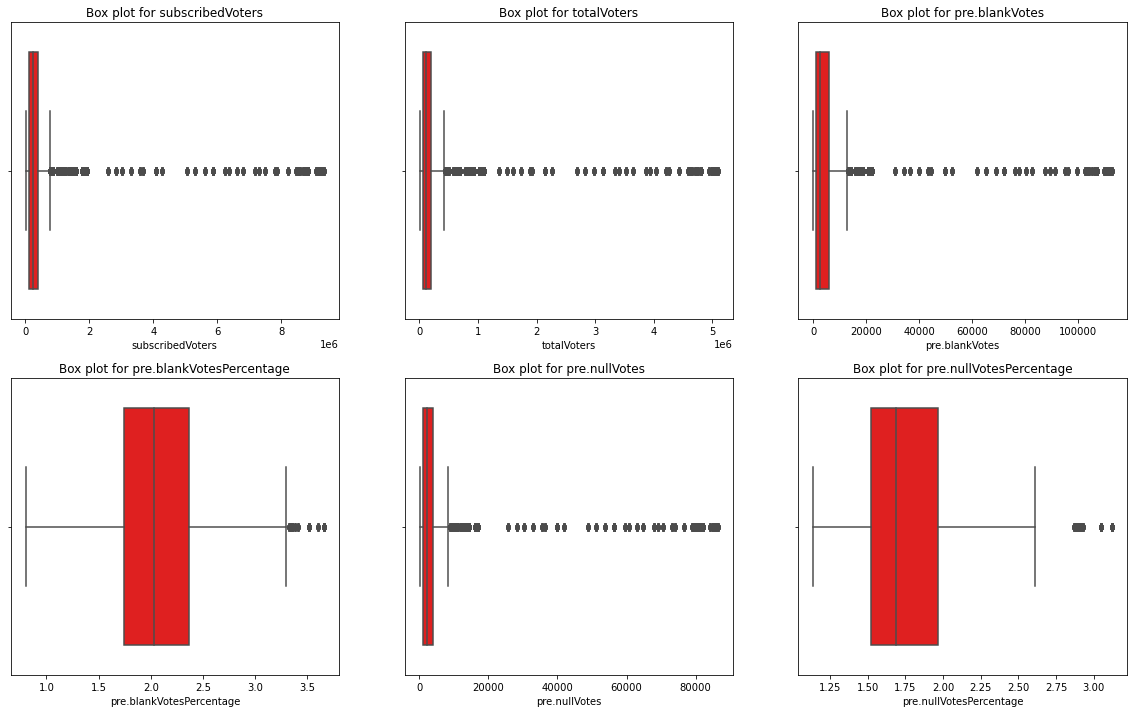

In [ ]:
# Column set 3
draw_boxes(colset3, 2, 3, (20, 12))

In [ ]:
cdata[colset3].describe().T

,count,mean,std,min,25%,50%,75%,max
subscribedVoters,21643.0,627536.747771,1.525590e+06,5767.00,122987.00,228954.00,380489.00,9343084.00
totalVoters,21643.0,339074.057571,8.290404e+05,2833.00,62671.00,106012.00,206918.00,5092424.00
pre.blankVotes,21643.0,7608.001386,1.849311e+04,32.00,1130.00,2595.00,5929.00,112666.00
pre.blankVotesPercentage,21643.0,2.071985,5.180250e-01,0.80,1.74,2.03,2.37,3.66
pre.nullVotes,21643.0,5914.629950,1.423604e+04,40.00,1124.00,2141.00,3967.00,86473.00
pre.nullVotesPercentage,21643.0,1.777442,3.887976e-01,1.14,1.52,1.69,1.97,3.12


#### **Conclusion:**
>1. For "subscribedVoters" And "totalVoters", Outliers are expected. It need not be handled. This outliers are region specific and count increases as time progresses.
2. For "pre.blankVotes" And "pre.nullVotes" ,Outliers are expected. It need not be handled. This is valid as this is region specific. And this count increases as time progresses.
3. For "pre.blankVotesPercentage" And "pre.nullVotesPercentage" depends upon the "pre.blankVotes" And "pre.nullVotes". So outliers are expected. These fields are negatively correlated with final target variable, so can be droped in further stages.

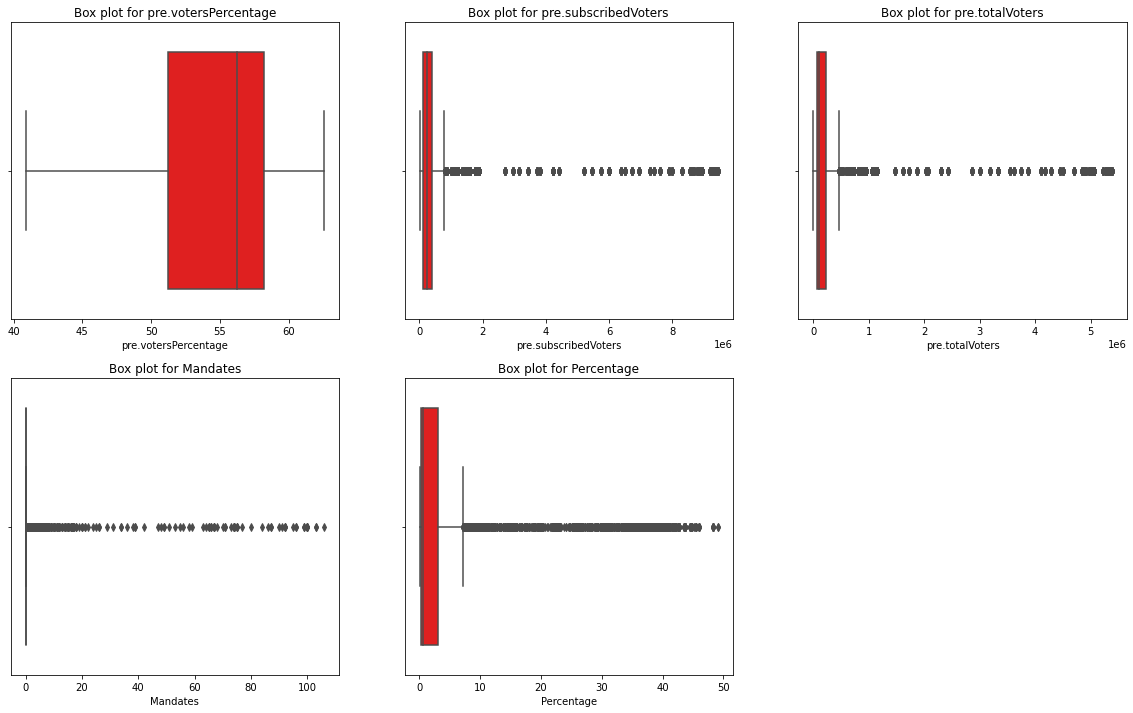

In [ ]:
# Column set 4
draw_boxes(colset4[:3]+colset4[4:6], 2, 3, (20, 12))

In [ ]:
cdata[colset4].describe()

,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage
count,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000
mean,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484
std,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967
min,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000
25%,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000
50%,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000
75%,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000
max,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000


#### **Conclusion**
>1. All the previous election values follow the similar trend as current election values. So outliers shown are expected.
2. The filed Mandates has values Zero most of the times since only as election progresses, this value increases.

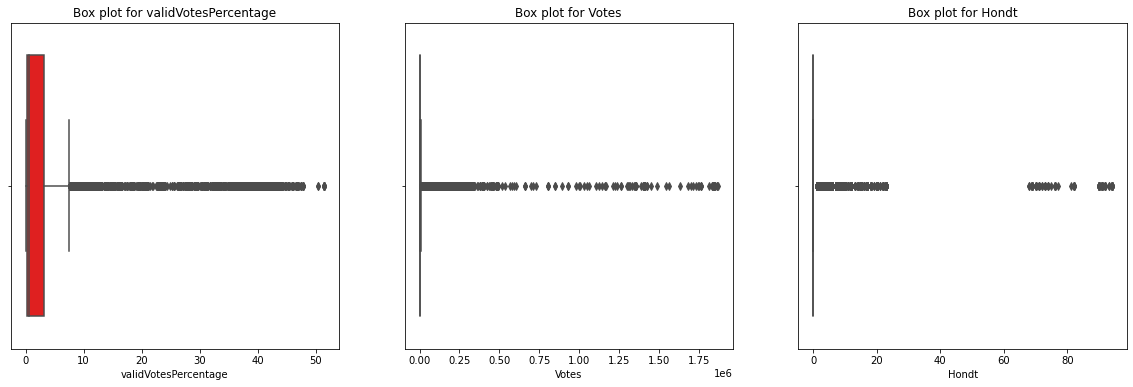

In [ ]:
# Column set 5
draw_boxes(colset5[:-1], 1, 3, (20, 6))

In [ ]:
cdata[colset5[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
validVotesPercentage,21643.0,5.207232,10.881108,0.02,0.23,0.65,3.16,51.42
Votes,21643.0,15852.090098,93106.048825,1.00,236.00,790.00,4510.00,1866407.00
Hondt,21643.0,1.126138,6.293552,0.00,0.00,0.00,0.00,94.00


#### **Conclusion**
>1. validVotesPercentage represents Percentage of valid votes in a party and Votes represent Percentage of party votes.<br>Since share of each party in different regions of Portugal varies the outliers detected in Box-plots cannot be considered for removal.
2. Hondt represents Number of MP’s according to the distribution of votes. This is a statistically calculated field that is meant to have high simalarity with target *Final Mandates*.<br>This value is Zero in Most cases since, majority of 21 parties in Protugal, doesnot have MP share in many districts.


#### Extracting feature and Target for further steps
***

In [ ]:
X = cdata.drop('FinalMandates', axis = 1) # Feature Set
y = pd.DataFrame(cdata['FinalMandates']) # Target

In [ ]:
print(f'Shape of feature set = {X.shape} and Shape of Target  = {y.shape}')
print(f'\nFeature columns = {X.columns.values}')

Shape of feature set = (21643, 27) and Shape of Target  = (21643, 1)

Feature columns = ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt']


<div class="alert alert-success"><b>3. Feature Reduction</b></div>

From Exploratory data analysis it was clear that *TimeElapsed* has no relationship with our target variable *FinalMandates*. This is because *TimeElapsed* just represents the time of data arrival, which was derived from the time column *time*.
* So both these columns can be dropped from our feature set.

In [ ]:
X.drop(['time','TimeElapsed'],axis = 1, inplace=True)

In [ ]:
X.drop(['territoryName', 'Party'], axis = 1).apply(lambda feature : feature.corr(y['FinalMandates'])).sort_values(ascending=True)

pre.nullVotesPercentage    -0.038686
nullVotesPercentage        -0.029659
blankVotesPercentage       -0.001195
pre.blankVotesPercentage    0.005716
pre.votersPercentage        0.050450
votersPercentage            0.061048
totalMandates               0.264117
availableMandates           0.266764
totalVoters                 0.294490
pre.blankVotes              0.294866
pre.totalVoters             0.295169
subscribedVoters            0.295555
blankVotes                  0.295583
pre.subscribedVoters        0.296428
pre.nullVotes               0.297482
nullVotes                   0.298663
numParishesApproved         0.312177
numParishes                 0.329009
validVotesPercentage        0.382744
Percentage                  0.383086
Mandates                    0.814370
Votes                       0.882502
Hondt                       0.994480
dtype: float64

Figure 15: Outliers in Column set 1
#### **Conclusion**
From EDA and above analysis, it is also clear that features *'pre.nullVotesPercentage', 'nullVotesPercentage','blankVotesPercentage', 'pre.blankVotesPercentage'* also does not have relationship with target variable *FinalMandates*.
* So these columns can be droped from feature set

In [ ]:
X.drop(['pre.nullVotesPercentage', 'nullVotesPercentage','blankVotesPercentage', 'pre.blankVotesPercentage'], axis = 1, inplace=True)

In [ ]:
print(f'New shape of feature set is {X.shape}')

New shape of feature set is (21643, 21)


<div class="alert alert-success"><b>4. Encoding</b></div>

In [ ]:
X[['territoryName','Party']].nunique()

territoryName    21
Party            21
dtype: int64

There are 21 unique values present for both **territoryName** and **Party**. So we can go ahead with *Label Encoding*

In [ ]:
encoder = LabelEncoder()
X['territoryName'] = encoder.fit_transform(X['territoryName'])
X['Party'] = encoder.fit_transform(X['Party'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   territoryName         21643 non-null  int32  
 1   totalMandates         21643 non-null  int64  
 2   availableMandates     21643 non-null  int64  
 3   numParishes           21643 non-null  int64  
 4   numParishesApproved   21643 non-null  int64  
 5   blankVotes            21643 non-null  int64  
 6   nullVotes             21643 non-null  int64  
 7   votersPercentage      21643 non-null  float64
 8   subscribedVoters      21643 non-null  int64  
 9   totalVoters           21643 non-null  float64
 10  pre.blankVotes        21643 non-null  int64  
 11  pre.nullVotes         21643 non-null  int64  
 12  pre.votersPercentage  21643 non-null  float64
 13  pre.subscribedVoters  21643 non-null  int64  
 14  pre.totalVoters       21643 non-null  int64  
 15  Party              

All features are now in numerical type.

<div class="alert alert-success"><b>5. Standardization</b></div>

In [ ]:
# Standard Scaling
X_columns = X.columns
y_columns = y.columns
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X_columns)
y = pd.DataFrame(StandardScaler().fit_transform(y), columns=y_columns) # target scaling for LinearRegression Model

In [ ]:
X.describe()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
count,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04,2.164300e+04
mean,8.665310e-16,-3.817613e-15,2.526614e-14,-1.976221e-16,7.333269e-16,-5.750910e-15,2.405208e-15,1.885296e-16,-4.022346e-15,2.968401e-15,-3.019683e-15,7.555772e-15,-7.377753e-16,3.093161e-15,-4.767852e-15,6.426500e-17,-1.626729e-14,-7.481938e-17,3.184524e-17,-5.504691e-16,1.389100e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.690343e+00,-3.686802e-01,-3.623185e-01,-3.883766e-01,-4.424172e-01,-4.122096e-01,-4.145922e-01,-3.296835e+00,-4.075697e-01,-4.055880e-01,-4.096757e-01,-4.126686e-01,-2.755253e+00,-4.088801e-01,-4.065466e-01,-1.647198e+00,-1.278907e-01,-4.767450e-01,-4.767302e-01,-1.702516e-01,-1.789393e-01
25%,-8.549335e-01,-3.367455e-01,-3.623185e-01,-3.565122e-01,-3.327087e-01,-3.577980e-01,-3.429945e-01,-3.489139e-01,-3.307321e-01,-3.334089e-01,-3.503008e-01,-3.365220e-01,-6.726051e-01,-3.295325e-01,-3.307449e-01,-9.946176e-01,-1.278907e-01,-4.574767e-01,-4.574302e-01,-1.677276e-01,-1.789393e-01
50%,-1.952365e-02,-2.409412e-01,-2.677948e-01,-2.472624e-01,-2.418563e-01,-2.735507e-01,-2.657641e-01,2.361382e-01,-2.612708e-01,-2.811292e-01,-2.710803e-01,-2.650820e-01,3.445489e-01,-2.650595e-01,-2.843834e-01,1.473982e-01,-1.278907e-01,-4.189401e-01,-4.188303e-01,-1.617772e-01,-1.789393e-01
75%,8.158862e-01,-8.126741e-02,-7.874724e-02,-1.031135e-01,-9.100706e-02,-9.244236e-02,-1.375671e-01,5.286643e-01,-1.619397e-01,-1.594122e-01,-9.079276e-02,-1.368130e-01,7.393255e-01,-1.583392e-01,-1.504796e-01,7.999787e-01,-1.278907e-01,-1.886835e-01,-1.881499e-01,-1.218219e-01,-1.789393e-01
max,1.651296e+00,6.848575e+00,6.758472e+00,4.221354e+00,4.852733e+00,5.619150e+00,5.591463e+00,1.624607e+00,5.713037e+00,5.733689e+00,5.681059e+00,5.658894e+00,1.617502e+00,5.699268e+00,5.729380e+00,1.615704e+00,2.384478e+01,4.252666e+00,4.247163e+00,1.987623e+01,1.475733e+01


#### **Conclusion**
The feature set is scaled, such that application of this feature space in any *Gradient Descent or Distance based* algorithms like Linear, Logistic Regression, KNN and SVM are unaffected by different scales.

<div class="alert alert-success"><b>6. Feature Engineering</b></div>

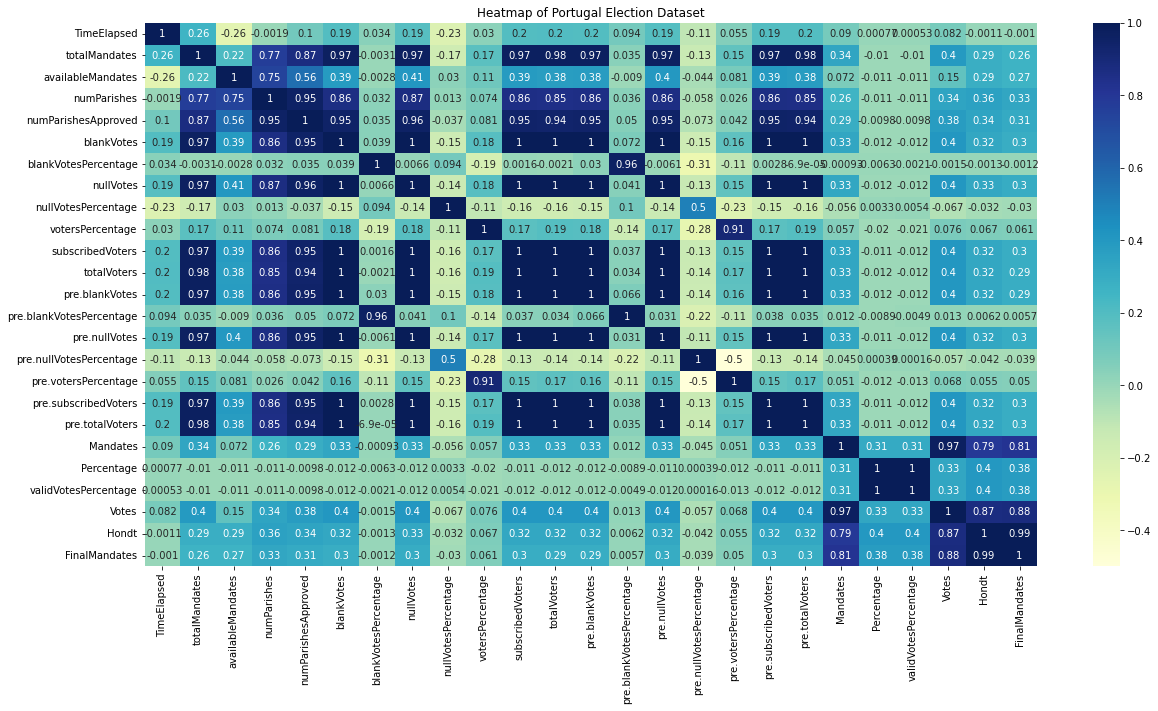

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Heatmap of Portugal Election Dataset')
sns.heatmap(data = cdata.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Lets evaluate VIF number as well to see multicolinearity**<br>
*VIF (Variance Inflation Factor)* is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.<br>The VIF value starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.

In [ ]:
def printVIF(data):
    vif_info = pd.DataFrame()
    vif_info['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif_info['Column'] = data.columns
    print(vif_info.sort_values('VIF', ascending=False))

In [ ]:
printVIF(X)

              VIF                Column
13  388293.433739  pre.subscribedVoters
8   324582.275534      subscribedVoters
14  109294.967086       pre.totalVoters
9    71009.946941           totalVoters
10   13700.984646        pre.blankVotes
17   10020.318083            Percentage
18   10018.271753  validVotesPercentage
5     9680.743813            blankVotes
11    5104.807983         pre.nullVotes
6     4732.879588             nullVotes
4      481.807483   numParishesApproved
1      168.919537         totalMandates
3      117.718780           numParishes
19      53.666214                 Votes
16      32.189247              Mandates
2       26.705648     availableMandates
7       16.751521      votersPercentage
12      15.017894  pre.votersPercentage
20       7.468624                 Hondt
0        1.612719         territoryName
15       1.076159                 Party


In [ ]:
# Generate new features from highly correlated features
X['diff_subscribedVoters'] = abs(X['subscribedVoters'] - X['pre.subscribedVoters'])
X['diff_totalVoters'] = abs(X['totalVoters'] - X['pre.totalVoters'])
X['diff_blankVotes'] = abs(X['blankVotes'] - X['pre.blankVotes'])
X['diff_nullVotes'] = abs(X['nullVotes'] - X['pre.nullVotes'])

Since *Percentage* and *validVotesPercentage* has same correlation with finalMandates, we can remove Percentage as *validVotesPercentage* will be more meaningful for a party

In [ ]:
removed_features =  ['subscribedVoters', 'pre.subscribedVoters', 'totalVoters', 'pre.totalVoters', 'blankVotes', 'pre.blankVotes', 'nullVotes', 'pre.nullVotes', 'Percentage']

In [ ]:
# Removing Higly correlated Variables
X.drop(removed_features, axis=1, inplace=True)

In [ ]:
printVIF(X)

          VIF                 Column
3   53.015642            numParishes
10  51.569684                  Votes
4   34.224877    numParishesApproved
8   31.087336               Mandates
1   13.666843          totalMandates
2   13.078120      availableMandates
15   9.427943         diff_nullVotes
14   8.128582        diff_blankVotes
6    7.931177   pre.votersPercentage
5    7.349146       votersPercentage
11   7.303910                  Hondt
13   5.280719       diff_totalVoters
12   4.616622  diff_subscribedVoters
0    1.403392          territoryName
9    1.295214   validVotesPercentage
7    1.075027                  Party


**Engineered Features ::** *['diff_subscribedVoters', 'diff_totalVoters', 'diff_blankVotes', 'diff_nullVotes']*<br>
**Removed_features ::** *['subscribedVoters', 'pre.subscribedVoters', 'totalVoters', 'pre.totalVoters', 'blankVotes', 'pre.blankVotes', 'nullVotes', 'pre.nullVotes', 'Percentage']*

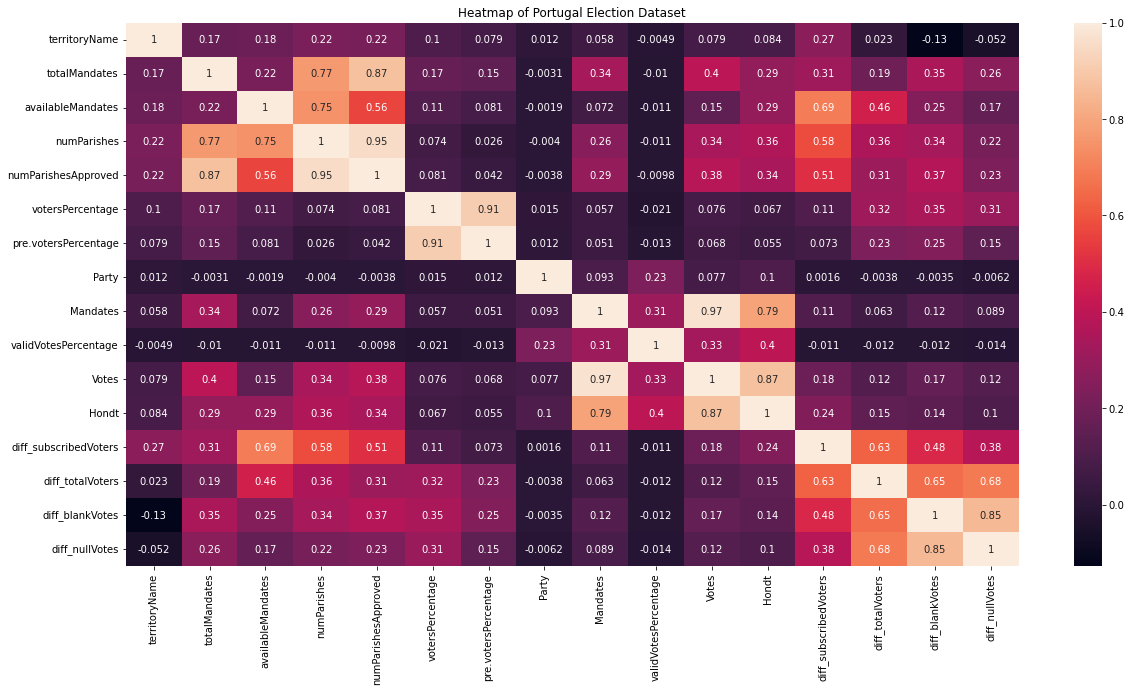

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Heatmap of Portugal Election Dataset')
sns.heatmap(X.corr(), annot = True)
plt.show()

In [ ]:
print(f'New shape of the dataset after feature engineering is {X.shape}')

New shape of the dataset after feature engineering is (21643, 16)


#### **Conclusion**
From Feature engineering we were able to generate 4 new features from existing features. These new features helps to remove multicolinearity between features.

In [ ]:
final_df = pd.concat((X, y), axis = 1)

In [ ]:
# Save the preprocessed data to new csv file for further steps
final_df.to_csv(path_or_buf='Processed_Portugal_Election_Data.csv', index=False, encoding = 'utf-8')

***